In [ ]:
import pandas as pd 
import numpy as np
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
document1 = open("Cut_taskb.txt", 'r')
sentences1 = document1.read().split('.')[:-1]
print(sentences1)
document2 = open("orig_taskb.txt", 'r')
sentences2 = document2.read().split('.')[:-1]

['PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set', ' Google assigns a numeric weighting from 0-10 for each webpage on the Internet; this PageRank? denotes a site’s importance in the eyes of Google', '\n\nThe PageRank? is derived from a theoretical probability value on a logarithmic scale like the Richter Scale', ' The PageRank? of a particular page is roughly based upon the quantity of inbound links as well as the PageRank? of the pages providing the links', ' The algorithm may be applied to any collection of entities with reciprocal quotations and references', ' The numerical weight that it assigns to any given element E is also called the PageRank? of E and denoted by PR(E)', '\n\nIt is known that other factors, e', 'g', ' relevance of search words on the page and actua

In [ ]:
def source_target_relation_triple(sentence, k):
    source = ''
    target = ''
    relation = ''
    for token in sentence:
        print(token.text, "->", token.dep_)
        if token.dep_ != "punct":
            if isRelationCandidate(token):
                relation = relation + ' ' + token.lemma_
            if "subj" in token.dep_:
                source = source + ' ' + token.text
            if "obj" in token.dep_:
                target = target + ' ' + token.text
    print("Triple ", k, ": Source:", source, ", Relation:", relation, ", Target:", target)
    
    return (source.strip(), relation.strip(), target.strip())


In [ ]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [ ]:
nlp_model = spacy.load('en_core_web_sm')
triples1 = []
i = 1
k = 1
print( "!!!!!!!!!!!!!!!!!!!!!!!!!!!!Document 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!" )
for sentence in sentences1:
    tokens = nlp_model(sentence)
    print("Sentence", i, ":", tokens )
    i = i + 1
    triples1.append(source_target_relation_triple(tokens, k))
    k = k +1
triples2 = []
k = 1
j = 1
print( "!!!!!!!!!!!!!!!!!!!!!!!!!!!!Document 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!" )
for sentence in sentences2:
    tokens = nlp_model(sentence)
    print("Sentence", j, ":", tokens )
    j = j + 1;
    triples2.append(source_target_relation_triple(tokens, k))
    k = k + 1

!!!!!!!!!!!!!!!!!!!!!!!!!!!!Document 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Sentence 1 : PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set
PageRank -> nsubj
is -> ROOT
a -> det
link -> compound
analysis -> compound
algorithm -> attr
used -> acl
by -> agent
the -> det
Google -> compound
Internet -> compound
search -> compound
engine -> pobj
that -> nsubj
assigns -> relcl
a -> det
numerical -> amod
weighting -> dobj
to -> prep
each -> det
element -> pobj
of -> prep
a -> det
hyperlinked -> amod
set -> pobj
of -> prep
documents -> pobj
, -> punct
such -> amod
as -> prep
the -> det
World -> compound
Wide -> compound
Web -> pobj
, -> punct
with -> prep
the -> det
purpose -> pobj
of -> prep
" -> punct
measuring -> pcomp
" -> punct
its -> poss
relative -> amod
importance ->

In [ ]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(14,14))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='green', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

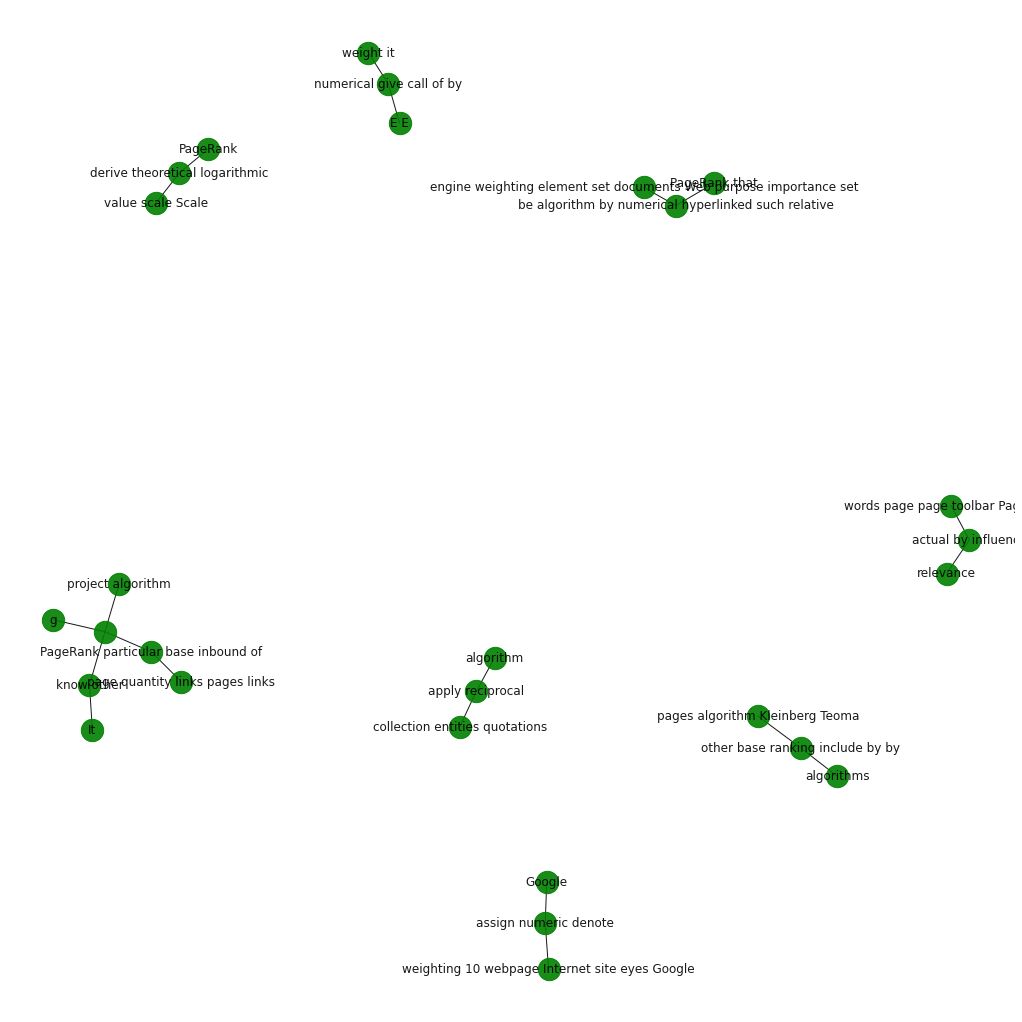

In [ ]:
printGraph(triples1)

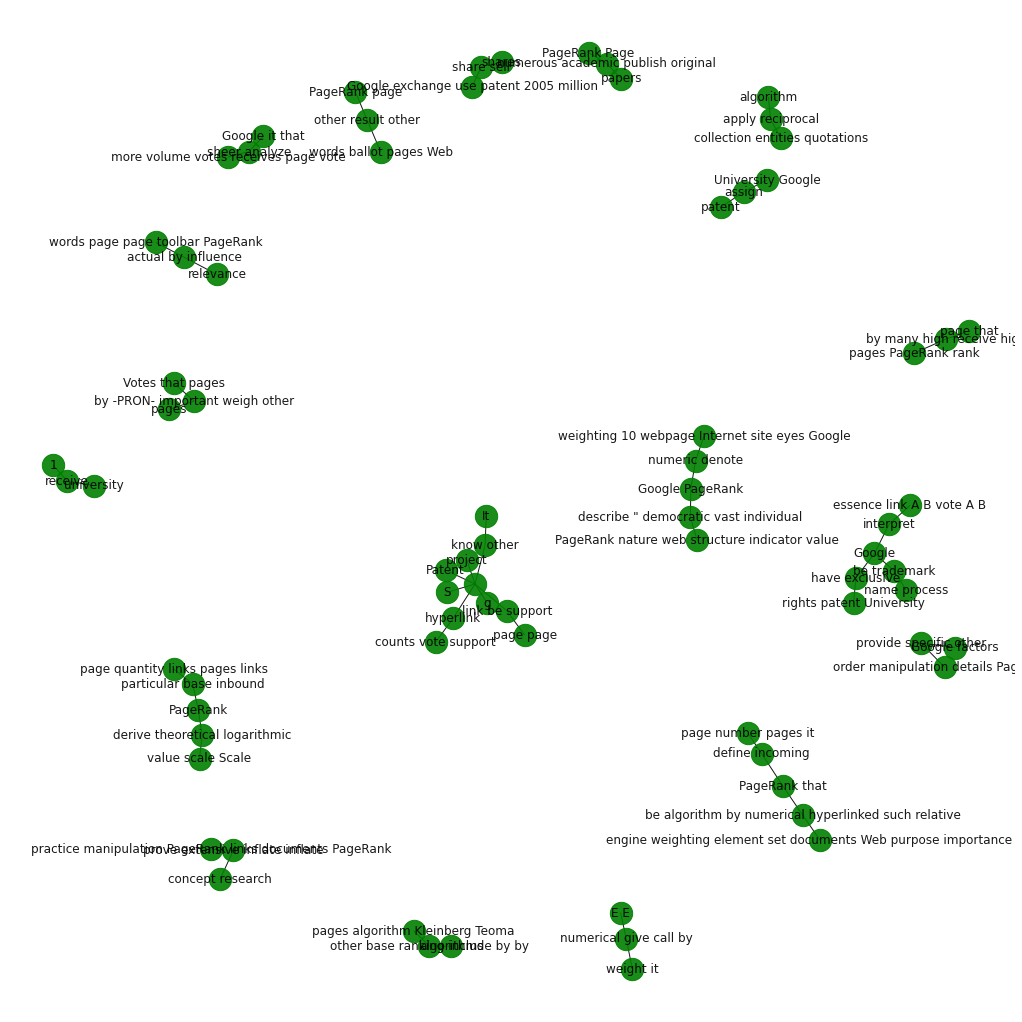

In [ ]:
printGraph(triples2)

In [ ]:
arr1 = ""
for i in range(0, len(triples1)):
  arr1 += triples1[i][0]
  arr1 += triples1[i][1]
  arr1 += triples1[i][2]

arr2 = ""
for i in range(0, len(triples2)):
  arr2 += triples2[i][0]
  arr2 += triples2[i][1]
  arr2 += triples2[i][2]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([arr1,arr2])
similar = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print('%.3f'%(similar*100))

49.654
